# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [2]:
import pandas as pd
import seaborn as sns

### Read the csv data into a pandas dataframe and display the first 5 samples

In [3]:
data = pd.read_csv("C:/Users/tinar/Desktop/Real estate.csv")
data.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [5]:
(samples,columns)=data.shape
samples,columns

(414, 8)

### What are the features available in the dataset?

In [6]:
data_features=data.columns
data_features

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Check if any features have missing data

In [7]:
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Group all the features as dependent features in X

In [8]:
X=data.iloc[:,0:7]
X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


### Group feature(s) as independent features in y

In [9]:
y=data.iloc[:,-1]
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

### Split the dataset into train and test data

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                               test_size=0.05,
                                               random_state=1)

### Choose the model (Linear Regression)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Create an Estimator object

In [12]:
lr_model=LinearRegression()

### Train the model

In [13]:
lr_model.fit(X_train,y_train)

LinearRegression()

### Apply the model

In [14]:
y_pred=lr_model.predict(X_test)
y_pred

array([34.47048938, 47.78921233, 22.09170483, 12.79533281, 43.19114802,
       34.1604081 , 30.6953065 , 45.2437122 , 37.79298748, 13.95352422,
       11.89624497, 38.05524517, 31.73071715, 45.30982111, 50.87209008,
       36.00298469, 44.35676396, 45.37658277, 30.05251881, 43.51231059,
       50.92787434])

### Display the coefficients

In [15]:
lr_model.coef_

array([-1.98565552e-03,  5.62352105e+00, -2.74464322e-01, -4.61104917e-03,
        1.09141496e+00,  2.31310649e+02, -2.01363649e+01])

### Find how well the trained model did with testing data

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6648470830972862

## Splitting the dataset with a different ratio

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                               test_size=0.2,
                                               random_state=1)

In [24]:
lr_model=LinearRegression()

In [25]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred=lr_model.predict(X_test)
y_pred

array([34.59222454, 47.58673483, 20.9226481 , 12.49402832, 43.11887361,
       34.53739706, 30.94528506, 45.32577595, 38.04839075, 13.90217198,
       11.89791644, 38.52611287, 31.88063097, 45.37604685, 50.84658168,
       36.2862735 , 44.41072387, 45.22203001, 30.05273304, 43.75888331,
       51.29456053, 28.42367787, 40.02214039, 46.83612492, 45.84974629,
       27.92864195, 31.22197429, 47.76028543, 46.28854703, 15.07952064,
       33.75569025, 34.83403033, 42.32056056, 44.63278564, 48.22580741,
       12.97087505, 41.19586968, 41.23713034, 38.99845431, 13.34108478,
       39.17706813, 24.42380144, 54.59173411, 36.60841823, 34.90462826,
       38.87349258, 30.70013923, 39.54325265, 45.86276573, 34.25812241,
       11.34870326, 44.60912585, 44.90742037, 13.80958428, 49.00623946,
       42.27434654, 44.23307525, 39.39850242, 38.07681462, 39.67756938,
       25.07802274, 40.22903165, 35.23138718, 12.73839662, 40.28227559,
       45.09055924, 39.4620461 , 47.19403621, 14.23920405, 40.31

In [27]:
lr_model.coef_

array([-1.09659640e-03,  5.69815368e+00, -2.49757004e-01, -4.94908683e-03,
        1.07369954e+00,  2.26802763e+02, -3.62816002e+01])

In [28]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7061990777416579

### Plot House Age Vs Price
#### Hint: Use regplot in sns

C:\Users\tinar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X2 house age', ylabel='Y house price of unit area'>

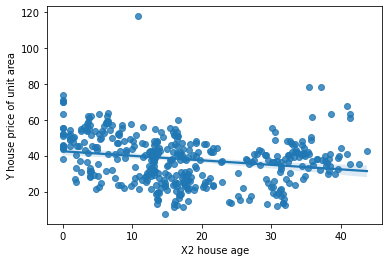

In [22]:
sns.regplot(data['X2 house age'],data['Y house price of unit area'])

### Plot Distance to MRT station Vs Price

C:\Users\tinar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Y house price of unit area', ylabel='X3 distance to the nearest MRT station'>

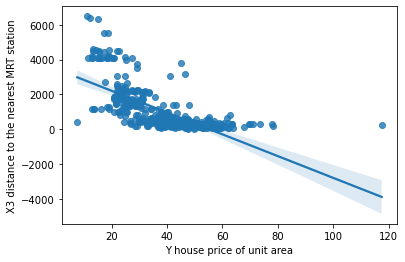

In [23]:
sns.regplot(data['Y house price of unit area'],data['X3 distance to the nearest MRT station'])

### Plot Number of Convienience Stores Vs Price

C:\Users\tinar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Y house price of unit area', ylabel='X4 number of convenience stores'>

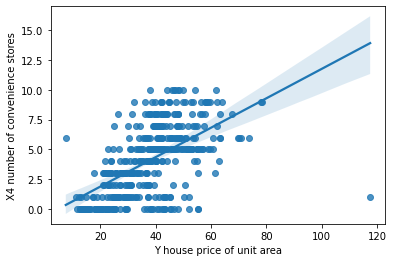

In [24]:
sns.regplot(data['Y house price of unit area'],data['X4 number of convenience stores'])